<a href="https://colab.research.google.com/github/inf032/introducaoML/blob/master/Farmaco_Validacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


HOLDOUT

In [105]:
SEED = 1
np.random.seed(SEED)
warnings.filterwarnings(action='once')

df = pd.read_csv('https://raw.githubusercontent.com/inf032/introducaoML/master/data/farmaco_preprocessado.csv', )

preditoras = ['IDADE', 'SEXO', 'PA', 'COLESTEROL', 'NA_K']
alvo = 'FARMACO'

X = df[preditoras]
y = df[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=SEED)

print(f'Treinaremos com {X_train.shape[0]} individuos e testaremos com {X_test.shape[0]} individuos')

Treinaremos com 156 individuos e testaremos com 68 individuos


In [106]:
def report_score(title, model, X_train, y_train, X_test, y_test) :
  model.fit(X_train, y_train)
  print(f'{title} - Acurácia [Treino: {np.round(model.score(X_train, y_train) *100, 2)}%] - [Teste: {np.round(model.score(X_test, y_test) *100, 2)}%]')  
  return model.score(X_train, y_train), model.score(X_test, y_test)

In [107]:
report_score('Decision Tree', DecisionTreeClassifier(random_state=SEED), 
             X_train, y_train, X_test,y_test)

Decision Tree - Acurácia [Treino: 100.0%] - [Teste: 95.59%]


(1.0, 0.9558823529411765)

In [108]:
from sklearn.dummy import DummyClassifier
report_score('Dummy', DummyClassifier(strategy='prior'), 
             X_train, y_train, X_test,y_test)

Dummy - Acurácia [Treino: 55.13%] - [Teste: 54.41%]


(0.5512820512820513, 0.5441176470588235)

In [109]:
np.random.seed(seed=None)
scores_test = []
scores_train = []
for i in range(500) :
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=None)
  model = DecisionTreeClassifier().fit(X_train, y_train)
  scores_test.append(model.score(X_test, y_test))
  scores_train.append(model.score(X_train, y_train))
print(scores_train)
print(scores_test)

print(f'Treino: {np.round(np.min(scores_train)*100, 2)}% a {np.round(np.max(scores_train)*100,2)}%')
print(f'Teste: {np.round(np.min(scores_test)*100, 2)}% a {np.round(np.max(scores_test)*100, 2)}%')

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

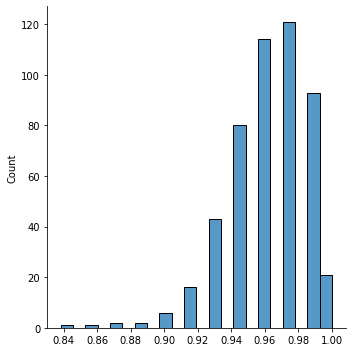

In [110]:
sns.displot(scores_test, kind='hist')

In [111]:
def print_resultado(modelo, mean, std):
  if(np.round((mean - 2*std) * 100, 2) > 0) :
    minimo = np.round((mean - 2*std) * 100, 2)
  else :
    minimo = 0
  if(np.round((mean + 2*std) * 100, 2) > 100) :
    maximo = 100
  else :
    maximo = np.round((mean + 2*std) * 100, 2)
  print(f'{modelo.__class__.__name__}: Média {np.round(mean *100, 2)}% - IC 95%: [{minimo}%, {maximo}%]' )

In [112]:
from sklearn.model_selection import cross_validate, KFold

np.random.seed(SEED)
#np.random.seed(None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=SEED)

modelo = DecisionTreeClassifier(max_depth=2)
for i in range(5) :
  results = cross_validate(modelo, X_train, y_train, cv = 5)
  print(results['test_score'])
  print_resultado(modelo, results['test_score'].mean(), results['test_score'].std())

[0.84375    0.87096774 0.83870968 0.93548387 0.87096774]
DecisionTreeClassifier: Média 87.2% - IC 95%: [80.3%, 94.09%]
[0.84375    0.87096774 0.83870968 0.93548387 0.87096774]
DecisionTreeClassifier: Média 87.2% - IC 95%: [80.3%, 94.09%]
[0.84375    0.87096774 0.83870968 0.93548387 0.87096774]
DecisionTreeClassifier: Média 87.2% - IC 95%: [80.3%, 94.09%]
[0.84375    0.87096774 0.83870968 0.93548387 0.87096774]
DecisionTreeClassifier: Média 87.2% - IC 95%: [80.3%, 94.09%]
[0.84375    0.87096774 0.83870968 0.93548387 0.87096774]
DecisionTreeClassifier: Média 87.2% - IC 95%: [80.3%, 94.09%]


In [113]:
#Aleatoriedade

from sklearn.model_selection import cross_validate, KFold
SEED = None
#SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=SEED)

modelo = DecisionTreeClassifier(max_depth=2)
for i in range(5) :
  results = cross_validate(modelo, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=SEED))
  print(results['test_score'])
  print_resultado(modelo, results['test_score'].mean(), results['test_score'].std())

[0.875      0.74193548 0.77419355 0.83870968 0.93548387]
DecisionTreeClassifier: Média 83.31% - IC 95%: [69.44%, 97.18%]
[0.875      0.80645161 0.87096774 0.93548387 0.83870968]
DecisionTreeClassifier: Média 86.53% - IC 95%: [77.94%, 95.12%]
[0.8125     0.96774194 0.90322581 0.93548387 0.93548387]
DecisionTreeClassifier: Média 91.09% - IC 95%: [80.44%, 100%]
[0.8125     0.87096774 0.90322581 0.87096774 0.96774194]
DecisionTreeClassifier: Média 88.51% - IC 95%: [78.38%, 98.64%]
[0.90625    0.93548387 0.87096774 0.80645161 0.74193548]
DecisionTreeClassifier: Média 85.22% - IC 95%: [71.23%, 99.21%]


In [114]:
#Aleatoriedade

from sklearn.model_selection import cross_validate, KFold
SEED = None
#SEED = 42
np.random.seed(SEED)

dfSorted = df.copy()
dfSorted.sort_values(alvo, ascending=False, inplace=True) 
dfSorted.index = range(dfSorted.shape[0])

X = dfSorted[preditoras]
y = dfSorted[alvo]

X_train = X.iloc[0:155]
y_train = y.iloc[0:155]
X_test = X.iloc[156:]
y_test = y.iloc[156:]

modelo = DecisionTreeClassifier(max_depth=2)
for i in range(5) :
  results = cross_validate(modelo, X_train, y_train, cv = KFold(n_splits=3, shuffle=False, random_state=SEED))
  print(results['test_score'])
  print_resultado(modelo, results['test_score'].mean(), results['test_score'].std())

[0.61538462 0.96153846 0.39215686]
DecisionTreeClassifier: Média 65.64% - IC 95%: [18.79%, 100%]
[0.61538462 0.96153846 0.39215686]
DecisionTreeClassifier: Média 65.64% - IC 95%: [18.79%, 100%]
[0.61538462 0.96153846 0.39215686]
DecisionTreeClassifier: Média 65.64% - IC 95%: [18.79%, 100%]
[0.61538462 0.96153846 0.39215686]
DecisionTreeClassifier: Média 65.64% - IC 95%: [18.79%, 100%]
[0.61538462 0.96153846 0.39215686]
DecisionTreeClassifier: Média 65.64% - IC 95%: [18.79%, 100%]


In [115]:
#Aleatoriedade

from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
SEED = None
#SEED = 42
np.random.seed(SEED)

dfSorted = df.copy()
dfSorted.sort_values(alvo, ascending=False, inplace=True) 
dfSorted.index = range(dfSorted.shape[0])

X = dfSorted[preditoras]
y = dfSorted[alvo]

X_train = X.iloc[0:155]
y_train = y.iloc[0:155]
X_test = X.iloc[156:]
y_test = y.iloc[156:]

modelo = DecisionTreeClassifier(max_depth=2)
for i in range(5) :
  results = cross_validate(modelo, X_train, y_train, cv = StratifiedKFold(n_splits=3, shuffle=False, random_state=SEED))
  print(results['test_score'])
  print_resultado(modelo, results['test_score'].mean(), results['test_score'].std())

[0.96153846 0.94230769 0.82352941]
DecisionTreeClassifier: Média 90.91% - IC 95%: [78.71%, 100%]
[0.96153846 0.94230769 0.82352941]
DecisionTreeClassifier: Média 90.91% - IC 95%: [78.71%, 100%]
[0.96153846 0.94230769 0.82352941]
DecisionTreeClassifier: Média 90.91% - IC 95%: [78.71%, 100%]
[0.96153846 0.94230769 0.82352941]
DecisionTreeClassifier: Média 90.91% - IC 95%: [78.71%, 100%]
[0.96153846 0.94230769 0.82352941]
DecisionTreeClassifier: Média 90.91% - IC 95%: [78.71%, 100%]


In [116]:
from sklearn.model_selection import cross_validate, LeaveOneOut

np.random.seed(SEED)
#np.random.seed(None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=SEED)

modelo = DecisionTreeClassifier(max_depth=2)
for i in range(5) :
  results = cross_validate(modelo, X_train, y_train, cv = LeaveOneOut())
  print(results['test_score'])
  print_resultado(modelo, results['test_score'].mean(), results['test_score'].std())

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
DecisionTreeClassifier: Média 91.67% - IC 95%: [36.39%, 100%]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.